<a href="https://colab.research.google.com/github/M-torki/ECG-Classification/blob/main/MITBIH_BeatClassification_Ozal%20Like.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
cd /gdrive/MyDrive/

/gdrive/MyDrive


In [ ]:
cd mit-bih-arrhythmia-database-1.0.0/

/gdrive/MyDrive/mit-bih-arrhythmia-database-1.0.0


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight
import warnings
warnings.filterwarnings('ignore')
from sklearn.utils import shuffle

In [ ]:
ls

100.atr    108.at_  117.at_  200.xws  210.dat  221.atr  234.atr
100.dat    108.atr  117.atr  201.atr  210.hea  221.dat  234.dat
100.hea    108.dat  117.dat  201.dat  210.xws  221.hea  234.hea
100.xws    108.hea  117.hea  201.hea  212.atr  221.xws  234.xws
101.atr    108.xws  117.xws  201.xws  212.dat  222.at_  ANNOTATORS
101.dat    109.atr  118.atr  202.atr  212.hea  222.atr  a_train.txt
101.hea    109.dat  118.dat  202.dat  212.xws  222.dat  A_train.txt
101.xws    109.hea  118.hea  202.hea  213.atr  222.hea  best_model.h5
102-0.atr  109.xws  118.xws  202.xws  213.dat  222.xws  best_modelozal.h5
102.atr    111.atr  119.at_  203.at_  213.hea  223.atr  F_train.txt
102.dat    111.dat  119.atr  203.at-  213.xws  223.dat  J_train.txt
102.hea    111.hea  119.dat  203.atr  214.at_  223.hea  L_train.txt
102.xws    111.xws  119.hea  203.dat  214.atr  223.xws  MIT_BIH_Record_100.csv
103.atr    112.atr  119.xws  203.hea  214.dat  228.atr  MITBIHtest1.csv
103.dat    112.dat  121.atr  203.xws  214.

In [ ]:
train_df=pd.read_csv('MITBIHtrain2.csv', index_col=0)
train_df = shuffle(train_df)

test_df=pd.read_csv('MITBIHtest2.csv', index_col=0)
test_df = shuffle(test_df)

In [ ]:
train_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259
18337,0.082707,0.071429,0.060150,0.063910,0.067669,0.075188,0.078947,0.075188,0.075188,0.071429,0.075188,0.078947,0.078947,0.078947,0.071429,0.071429,0.075188,0.086466,0.090226,0.090226,0.090226,0.086466,0.086466,0.097744,0.101504,0.093985,0.090226,0.086466,0.093985,0.097744,0.093985,0.082707,0.086466,0.082707,0.093985,0.101504,0.097744,0.090226,0.075188,0.075188,...,0.101504,0.105263,0.109023,0.109023,0.112782,0.109023,0.124060,0.131579,0.139098,0.150376,0.154135,0.169173,0.191729,0.221805,0.266917,0.342105,0.417293,0.503759,0.590226,0.661654,0.755639,0.830827,0.879699,0.887218,0.860902,0.804511,0.706767,0.593985,0.451128,0.312030,0.233083,0.218045,0.214286,0.184211,0.146617,0.127820,0.127820,0.127820,0.112782,0
52926,0.347107,0.343802,0.345455,0.343802,0.347107,0.350413,0.348760,0.352066,0.353719,0.350413,0.350413,0.347107,0.348760,0.343802,0.345455,0.347107,0.348760,0.350413,0.353719,0.357025,0.357025,0.353719,0.355372,0.352066,0.350413,0.355372,0.355372,0.360331,0.365289,0.366942,0.368595,0.376860,0.380165,0.380165,0.388430,0.385124,0.390083,0.390083,0.390083,0.390083,...,0.357025,0.357025,0.358678,0.358678,0.363636,0.366942,0.365289,0.366942,0.363636,0.360331,0.360331,0.357025,0.355372,0.357025,0.358678,0.365289,0.363636,0.366942,0.365289,0.365289,0.366942,0.366942,0.363636,0.361983,0.360331,0.365289,0.370248,0.373554,0.373554,0.373554,0.376860,0.371901,0.370248,0.368595,0.370248,0.368595,0.370248,0.371901,0.373554,0
74631,0.468202,0.468202,0.468202,0.467105,0.467105,0.467105,0.467105,0.467105,0.467105,0.468202,0.470395,0.472588,0.472588,0.470395,0.469298,0.470395,0.470395,0.472588,0.476974,0.476974,0.474781,0.472588,0.474781,0.475877,0.479167,0.480263,0.476974,0.476974,0.475877,0.481360,0.481360,0.480263,0.478070,0.479167,0.476974,0.480263,0.482456,0.479167,0.480263,0.478070,...,0.844298,0.843202,0.839912,0.832237,0.821272,0.813596,0.809211,0.803728,0.798246,0.786184,0.777412,0.766447,0.756579,0.748904,0.740132,0.723684,0.710526,0.698465,0.688596,0.679825,0.671053,0.661184,0.649123,0.635965,0.627193,0.616228,0.610746,0.599781,0.589912,0.580044,0.574561,0.566886,0.560307,0.555921,0.547149,0.543860,0.542763,0.542763,0.538377,4
61762,0.135678,0.142379,0.144054,0.145729,0.140704,0.135678,0.135678,0.134003,0.139028,0.139028,0.139028,0.140704,0.142379,0.145729,0.142379,0.149079,0.149079,0.149079,0.149079,0.145729,0.144054,0.145729,0.150754,0.155779,0.159129,0.169179,0.172529,0.172529,0.170854,0.172529,0.167504,0.164154,0.164154,0.162479,0.160804,0.162479,0.162479,0.159129,0.160804,0.162479,...,0.134003,0.137353,0.142379,0.147404,0.152429,0.154104,0.159129,0.169179,0.172529,0.179229,0.179229,0.185930,0.187605,0.182580,0.184255,0.184255,0.180905,0.180905,0.182580,0.184255,0.184255,0.184255,0.182580,0.179229,0.179229,0.170854,0.165829,0.164154,0.155779,0.157454,0.150754,0.149079,0.145729,0.145729,0.140704,0.139028,0.139028,0.134003,0.128978,1
61298,0.132653,0.134354,0.130952,0.127551,0.127551,0.125850,0.127551,0.125850,0.122449,0.130952,0.129252,0.129252,0.132653,0.130952,0.130952,0.130952,0.125850,0.125850,0.130952,0.130952,0.130952,0.129252,0.129252,0.130952,0.136054,0.134354,0.134354,0.139456,0.132653,0.129252,0.127551,0.125850,0.136054,0.141156,0.144558,0.149660,0.156463,0.158163,0.154762,0.151361,...,0.110544,0.117347,0.115646,0.117347,0.124150,0.127551,0.134354,0.137755,0.142857,0.144558,0.146259,0.144558,0.142857,0.141156,0.139456,0.141156,0.139456,0.139456,0.139456,0.141156,0.136054,0.134354,0.130952,0.124150,0.115646,0.110544,0.105442,0.103741,0.098639,0.100340,0.095238,0.098639,0.096939,0.088435,0.091837,0.086735,0.079932,0.079932,0.078231,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

##the distribution of labels in train dataset

In [ ]:
train_df['259']=train_df['259'].astype(int)
equilibre=train_df['259'].value_counts()
print(equilibre)
train_df.shape

0    59828
2     6443
1     5791
3     5691
4     5603
Name: 259, dtype: int64


(83356, 260)

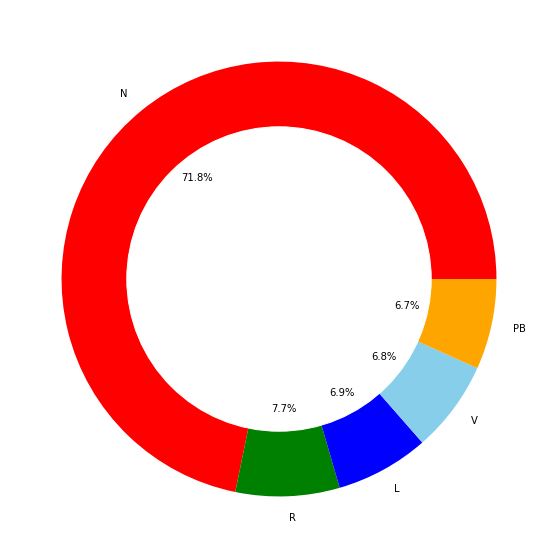

In [ ]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=['N','R','L','V','PB'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [ ]:
target_train=train_df['259']
target_test=test_df['259']
y_train=to_categorical(target_train)
y_test=to_categorical(target_test)

In [ ]:


X_train=train_df.iloc[:,:259].values
X_test=test_df.iloc[:,:259].values
#for i in range(len(X_train)):
#    X_train[i,:186]= add_gaussian_noise(X_train[i,:186])
X_train = X_train.reshape(len(X_train), X_train.shape[1],1)
X_test = X_test.reshape(len(X_test), X_test.shape[1],1)



In [ ]:
X_train.shape

(83356, 259, 1)

##network

In [ ]:
def network(X_train,y_train,X_test,y_test):
    

    im_shape=(X_train.shape[1],1)
    inputs_cnn=Input(shape=(im_shape), name='inputs_cnn')
    conv1_1=Convolution1D(16, (6), activation='relu', input_shape=im_shape)(inputs_cnn)
    conv1_1=BatchNormalization()(conv1_1)
    pool1=MaxPool1D(pool_size=(3), strides=(2), padding="same")(conv1_1)
    conv2_1=Convolution1D(32, (3), activation='relu', input_shape=im_shape)(pool1)
    conv2_1=BatchNormalization()(conv2_1)
    pool2=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv2_1)
    conv3_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool2)
    conv3_1=BatchNormalization()(conv3_1)
    pool3=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv3_1)
    flatten=Flatten()(pool3)
    dense_end1 = Dense(64, activation='relu')(flatten)
    dense_end2 = Dense(32, activation='relu')(dense_end1)
    main_output = Dense(5, activation='softmax', name='main_output')(dense_end2)
    
    
    model = Model(inputs= inputs_cnn, outputs=main_output)
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics = ['accuracy'])
    model.summary()
    
    
    callbacks = [EarlyStopping(monitor='val_loss', patience=8),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

    history=model.fit(X_train, y_train,epochs=10,callbacks=callbacks, batch_size=32,validation_data=(X_test,y_test))
    model.load_weights('best_model.h5')
    return(model,history)

In [ ]:
def evaluate_model(history,X_test,y_test,model):
    scores = model.evaluate((X_test),y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))
    
    print(history)
    fig1, ax_acc = plt.subplots()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model - Accuracy')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()
    
    fig2, ax_loss = plt.subplots()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model- Loss')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.show()
    target_names=['0','1','2','3','4']
    
    y_true=[]
    for element in y_test:
        y_true.append(np.argmax(element))
    prediction_proba=model.predict(X_test)
    prediction=np.argmax(prediction_proba,axis=1)
    cnf_matrix = confusion_matrix(y_true, prediction)

In [ ]:
from keras.layers import Dense, Convolution1D, MaxPool1D, Flatten, Dropout
from keras.layers import Input
from keras.models import Model
from keras.layers.normalization import BatchNormalization
import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint

model,history=network(X_train,y_train,X_test,y_test)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs_cnn (InputLayer)      [(None, 259, 1)]          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 254, 16)           112       
_________________________________________________________________
batch_normalization (BatchNo (None, 254, 16)           64        
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 127, 16)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 125, 32)           1568      
_________________________________________________________________
batch_normalization_1 (Batch (None, 125, 32)           128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 63, 32)            0     

##evaluate model

Accuracy: 92.02%


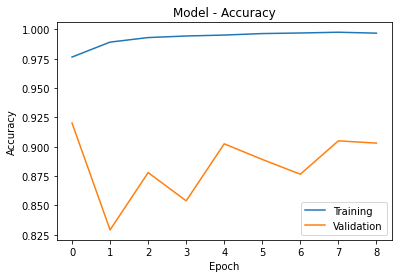

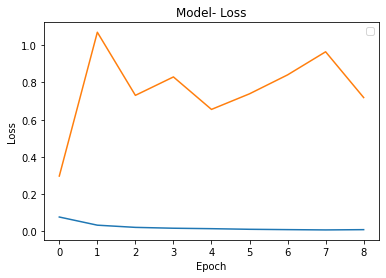

[[9.9945146e-01 3.4695564e-04 5.2469059e-05 1.3080981e-08 1.4922177e-04]
 [6.0846467e-08 6.2877606e-13 6.1631991e-11 2.8080405e-13 9.9999988e-01]
 [1.0000000e+00 4.0689768e-10 7.1822426e-10 5.6068691e-13 5.8739152e-11]
 ...
 [9.9787009e-01 1.6968482e-03 3.5158519e-05 2.7811949e-04 1.1966426e-04]
 [2.7216126e-07 2.8636562e-11 1.1691975e-09 5.7869955e-11 9.9999976e-01]
 [9.9997652e-01 2.2958784e-05 1.7458810e-07 4.6119879e-08 3.6570654e-07]]
Result from real time data included in testing dataset:
0


In [ ]:
evaluate_model(history,X_test,y_test,model)
y_pred=model.predict(X_test)

print(y_pred) 
print("Result from real time data included in testing dataset:")
Y_pred_classes = np.argmax(y_pred,axis = 1) 
print(Y_pred_classes[0])

##confusion matrix plotter

Normalized confusion matrix


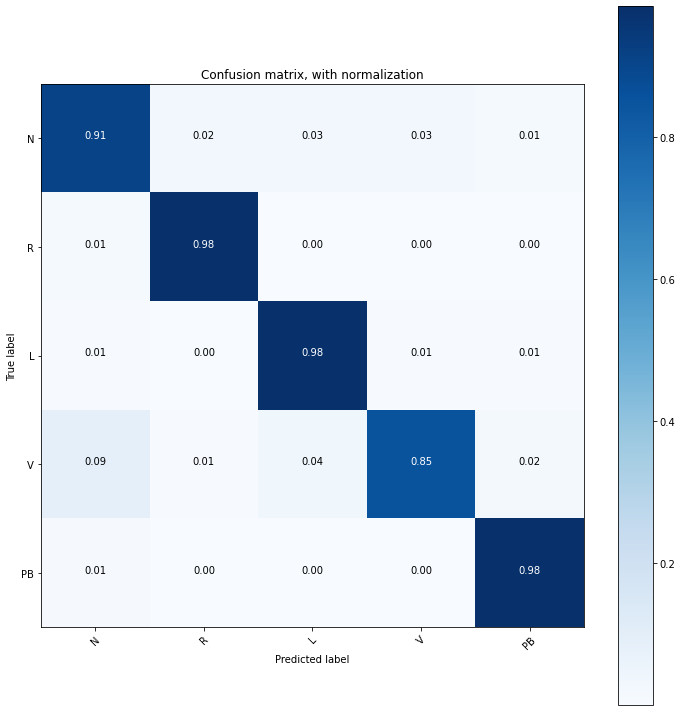

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['N', 'R', 'L', 'V', 'PB'],normalize=True,
                      title='Confusion matrix, with normalization')
plt.show()

##classification report

In [ ]:
classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1), labels = [0, 1, 2, 3, 4], target_names=['N', 'R', 'L', 'V', 'PB'],
                      output_dict = True)

{'L': {'f1-score': 0.8661894273127754,
  'precision': 0.777942631058358,
  'recall': 0.9770186335403727,
  'support': 1610},
 'N': {'f1-score': 0.9468222183527772,
  'precision': 0.9880796627416776,
  'recall': 0.9088721000200575,
  'support': 14957},
 'PB': {'f1-score': 0.9140391636242947,
  'precision': 0.8536887786732796,
  'recall': 0.9835714285714285,
  'support': 1400},
 'R': {'f1-score': 0.8702337023370235,
  'precision': 0.783499446290144,
  'recall': 0.9785615491009682,
  'support': 1446},
 'V': {'f1-score': 0.7931937172774869,
  'precision': 0.7412844036697248,
  'recall': 0.8529204785362421,
  'support': 1421},
 'accuracy': 0.9201785542862628,
 'macro avg': {'f1-score': 0.8780956457808715,
  'precision': 0.8288989844866368,
  'recall': 0.9401888379538137,
  'support': 20834},
 'weighted avg': {'f1-score': 0.9225941217615781,
  'precision': 0.9317780924797949,
  'recall': 0.9201785542862628,
  'support': 20834}}